# Statistics

The [astropy.stats](http://docs.astropy.org/en/stable/stats/index.html) sub-package includes common statistical tools for astronomy. It is by no means complete and we are open to contributions for more functionality! In this tutorial, we will take a look at some of the existing functionality.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Use sigma clipping on arrays</li>
<li>Use automatic bin determination for histograms</li>
<li>Work with binomial and Poisson distributions</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.stats. For more information about the features presented below as well as other available features, you can read the
[astropy.stats documentation](https://docs.astropy.org/en/stable/stats/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Sigma clipping

A very common operation with astronomical data is sigma-clipping, where values in a dataset are iteratively excluded if they deviate too much from some overall statistic. To illustrate this, we use an image of a star field for which we want to estimate the background:

In [5]:
from photutils.datasets import load_star_image
star_image = load_star_image()
star_image

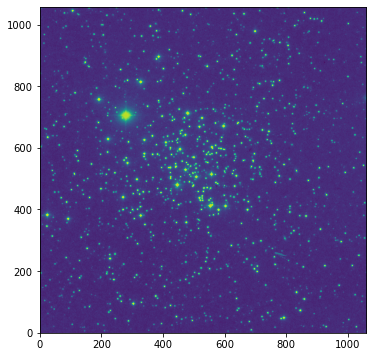

In [7]:
plt.imshow(star_image.data);

In [9]:
from astropy.stats import sigma_clip

In [10]:
clipped_image = sigma_clip(star_image.data, sigma=2, maxiters=20)

The result is a masked Numpy array:

In [11]:
clipped_image

masked_array(
  data=[[--, --, --, ..., 3698, 3698, 3516],
        [--, --, --, ..., 3698, 3698, 3879],
        [3689, 3689, 3689, ..., 3516, 3516, 3607],
        ...,
        [3749, --, 3476, ..., 3707, 3707, 3435],
        [3749, --, 3476, ..., 3707, 3707, 3435],
        [3658, 3658, 3839, ..., 3525, 3525, 3525]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False,  True, False, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=999999,
  dtype=int16)

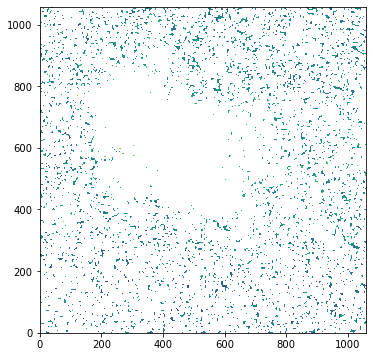

In [13]:
plt.imshow(clipped_image);

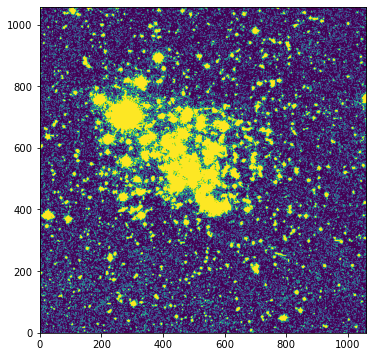

In [16]:
plt.imshow(clipped_image.mask);

We can then estimate the background and background noise easily for example:

In [20]:
import numpy as np
print(np.mean(clipped_image))
print(np.std(clipped_image))

3714.4805197616456
151.23765628880292


The ``sigma_clip`` function includes a number of options to refine the algorithm, including what statistics to use during the sigma-clipping, and also allows for asymmetric sigma values. See the [sigma_clip() documentation](https://docs.astropy.org/en/stable/api/astropy.stats.sigma_clip.html) for more details.

As a shortcut for deriving sigma-clipped statistics as done above, a ``sigma_clipped_stats`` function:

In [24]:
from astropy.stats import sigma_clipped_stats
mean, median, stdev = sigma_clipped_stats(star_image.data)
print(mean, median, stdev)

3770.4896097401975 3744.0 237.21215226532127


## Choosing histogram bins

Another example of functionality in the astropy.stats sub-package is the [histogram()](http://docs.astropy.org/en/stable/api/astropy.stats.histogram.html#astropy.stats.histogram) function, which is exposed through the [hist()](http://docs.astropy.org/en/stable/api/astropy.visualization.hist.html#astropy.visualization.hist) function in astropy.visualization for ease of use. These functions provide an easy way to use smart binning algorithms for data. 

Let's start off by creating some synthetic data:

In [26]:
data = np.hstack([np.random.normal(3, 1, 2000), np.random.normal(10, 0.5, 2000)])

We can use Matplotlib to make a histogram, but the number of bins has to be set (or defaults to an arbitrary values) and is not necessarily optimal:

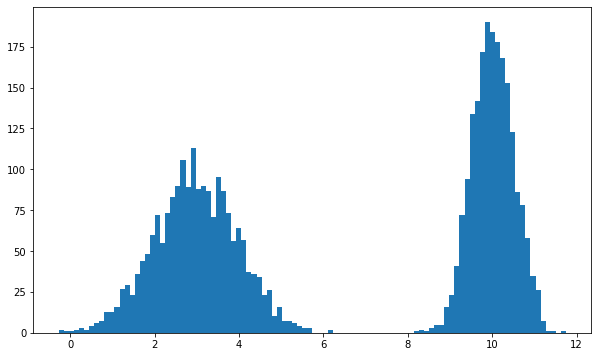

In [39]:
_ = plt.hist(data, bins=100)

We can instead try and use the the [hist()](http://docs.astropy.org/en/stable/api/astropy.visualization.hist.html#astropy.visualization.hist) function in astropy.visualization to try out different methods of automatically selecting the bins:

In [34]:
from astropy.visualization import hist

for example using [Bayesian Blocks](https://arxiv.org/abs/1207.5578):

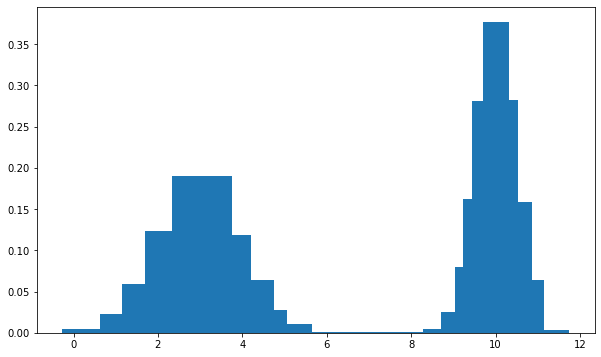

In [37]:
_ = hist(data, bins='blocks', density=True)

or [Knuth's rule](https://arxiv.org/abs/physics/0605197):

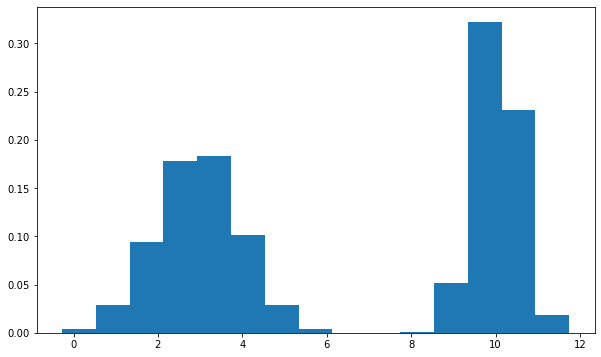

In [41]:
_ = hist(data, bins='knuth', density=True)

If you want to get the underlying values, use the [histogram()](http://docs.astropy.org/en/stable/api/astropy.stats.histogram.html#astropy.stats.histogram) function in astropy.stats:

In [44]:
from astropy.stats import histogram
hist, bins = histogram(data, bins = 'knuth', density = True)

In [45]:
hist

array([0.00436797, 0.02870378, 0.09453526, 0.17815061, 0.18314257,
       0.10171121, 0.02901577, 0.00436797, 0.        , 0.        ,
       0.00124799, 0.0514796 , 0.32198148, 0.23119019, 0.01809586])

## Binomial and Poisson distributions

A third set of functionality in astropy.stats are functions to help with calculations related to binomial and Poisson distributions. For example, if we observe 150 galaxies and find that 50 are spirals, we can estimate confidence intervals using [binom_conf_interval()](http://docs.astropy.org/en/stable/api/astropy.stats.binom_conf_interval.html#astropy.stats.binom_conf_interval) for the true underlying fraction of spiral galaxies that would have been observed if the sample had been much larger (and with the same selection criteria/biases):

In [46]:
from astropy.stats import binom_conf_interval

By default, the confidence interval returned is the 68.27% confidence interval ('1-sigma'):

In [47]:
binom_conf_interval(k=50, n=150)

array([0.29605882, 0.37281536])

In [48]:
binom_conf_interval(k=50, n=150, confidence_level=0.9973)

array([0.23021747, 0.45531684])

Similarly, if we detect 10 photons in a pixel, we can determine the confidence interval for the underlying brightness of the emission in the pixel using [poisson_conf_interval()](http://docs.astropy.org/en/stable/api/astropy.stats.poisson_conf_interval.html#astropy.stats.poisson_conf_interval):

In [49]:
from astropy.stats import poisson_conf_interval

In [50]:
poisson_conf_interval(n=10)

array([ 6.83772234, 13.16227766])

In [51]:
poisson_conf_interval(n=10, interval='frequentist-confidence', sigma=1)

array([ 6.89130556, 14.26694976])

In [52]:
poisson_conf_interval(n=10, interval='kraft-burrows-nousek', confidence_level=0.6827)

array([[ 7.14081292],
       [13.53628597]])


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Take a look at the <a href="http://docs.astropy.org/en/stable/stats/index.html">astropy.stats documentation</a>, and in particular the long list of functions at the bottom, in case you see something that could be useful to you! (and feel free to try them if so)</li>
<li>If you had to find the median absolute deviation for a dataset, how would you do it? Try and find the robust standard deviation using the median absolute deviation for the sigma clipped array we produced before.</li>
</ol>

</div>

</section>


<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)